In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

%matplotlib inline

# part 0

In [5]:
def make_draws(dist, params, size=200):
  """
  Draw samples of random variables from a specified distribution
  with given parameters and return these in an array.

  INPUT:
  dist: (Scipy.stats distribution object) Distribution with a .rvs method
  params: (dict) Parameters to define the distribution dist.
                e.g. if dist = scipy.stats.binom then params could be:
                {'n': 100, 'p': 0.25}
  size: (int) Number of samples to draw

  OUTPUT:
  (Numpy array) Sample of random variables 
  """
  return dist(**params).rvs(size) 

# Generate draws from the Binomial Distribution, using Scipy's binom object.  
binomial_samp = make_draws(stats.binom, {'n': 100, 'p':0.25}, size=200)
binomial_samp

array([25, 31, 27, 25, 20, 24, 33, 18, 22, 25, 24, 28, 31, 24, 18, 23, 18,
       21, 33, 28, 24, 27, 18, 25, 27, 33, 27, 30, 31, 24, 24, 28, 26, 19,
       33, 21, 25, 22, 29, 21, 16, 28, 26, 30, 30, 23, 23, 18, 25, 21, 29,
       32, 16, 22, 29, 27, 23, 26, 26, 29, 29, 30, 29, 22, 26, 23, 28, 19,
       34, 24, 26, 25, 28, 19, 28, 30, 21, 20, 25, 27, 23, 25, 22, 24, 27,
       23, 21, 25, 25, 19, 27, 19, 20, 19, 33, 20, 24, 27, 26, 24, 26, 23,
       27, 17, 27, 20, 25, 24, 19, 28, 21, 26, 23, 25, 25, 25, 21, 20, 25,
       20, 25, 24, 28, 23, 21, 23, 20, 21, 24, 28, 27, 19, 30, 27, 22, 22,
       24, 21, 20, 30, 26, 28, 23, 20, 26, 26, 25, 18, 23, 18, 21, 28, 19,
       22, 17, 16, 21, 31, 27, 23, 22, 20, 27, 26, 28, 22, 17, 21, 25, 15,
       22, 18, 20, 33, 27, 24, 30, 24, 20, 24, 20, 19, 21, 31, 19, 22, 28,
       26, 22, 24, 31, 21, 27, 21, 33, 26, 23, 31, 20, 27])

In [13]:
def plot_bootstrapped_statistics(dist, params, stat_function=np.mean, size=200, repeats=5000):
    dist_instance = dist(**params)

    bootstrapped_statistics = []
    for _ in range(repeats):
        values = dist_instance.rvs(size)
        bootstrapped_statistics.append(stat_function(values))

    d_label = {
        stats.uniform: ['Uniform', 'Mean of randomly drawn values from a uniform'],
        stats.poisson: ['Poisson', 'Mean events happening in an interval'],
        stats.binom: ['Binomial', 'Mean number of successes'],
        stats.expon: ['Exponential', 'Mean of waiting time before an event'],
        stats.geom: ['Geometric', 'Mean trials until first success']
        }

    dist_name, xlabel = d_label[dist]
    title_str = 'Mean of {0} samples with each sample size {1} drawn from {2} distribution'
    title_str = title_str.format(repeats, size, dist_name)

    fig, ax = plt.subplots(figsize=(4, 3))

    ax.hist(bootstrapped_statistics, bins=30)
    ax.set_xlabel(xlabel)
    ax.set_ylabel('Counts')
    ax.set_title(title_str, fontsize=11)

# Sample Size 200

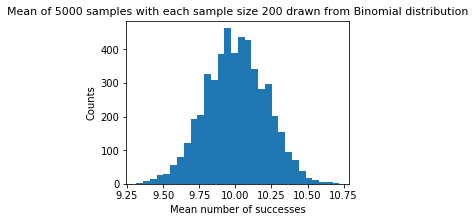

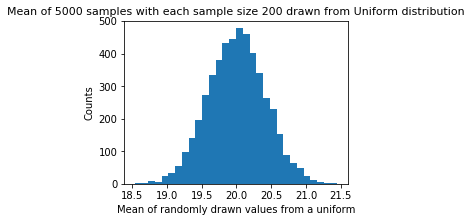

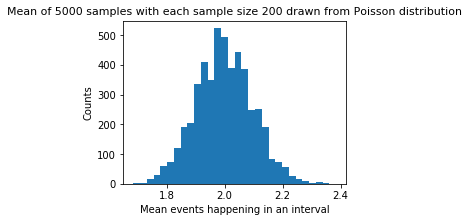

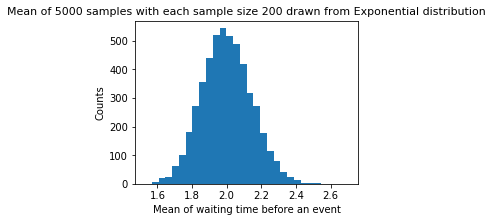

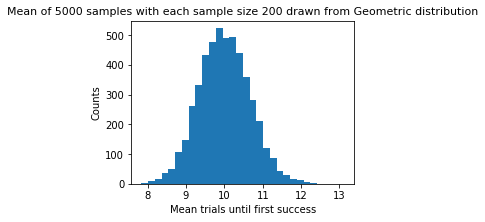

In [14]:
plot_bootstrapped_statistics(stats.binom, {'n': 100, 'p': 0.1})
plot_bootstrapped_statistics(stats.uniform, {'loc': 10, 'scale': 20}) 
plot_bootstrapped_statistics(stats.poisson, {'mu': 2}) 
plot_bootstrapped_statistics(stats.expon, {'scale': 2})
plot_bootstrapped_statistics(stats.geom, {'p': 0.1})

# Sample Size 10

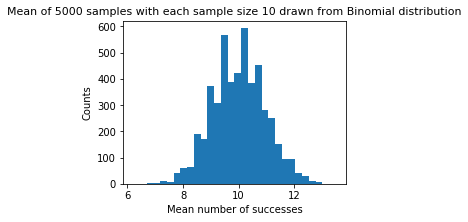

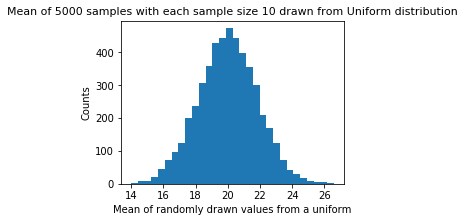

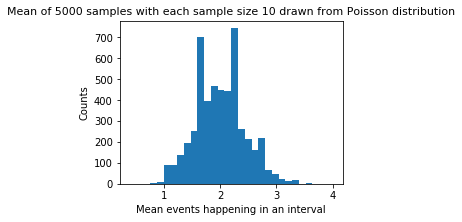

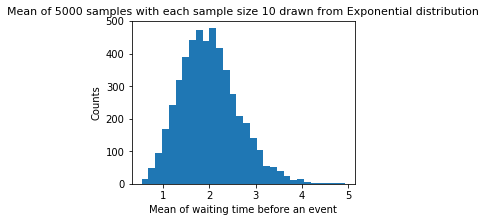

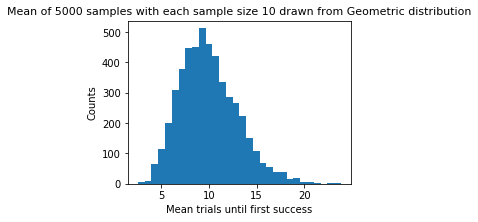

In [15]:
plot_bootstrapped_statistics(stats.binom, {'n': 100, 'p': 0.1}, size=10, repeats=5000)
plot_bootstrapped_statistics(stats.uniform, {'loc': 10, 'scale': 20}, size=10, repeats=5000) 
plot_bootstrapped_statistics(stats.poisson, {'mu': 2}, size=10, repeats=5000) 
plot_bootstrapped_statistics(stats.expon, {'scale': 2}, size=10, repeats=5000)
plot_bootstrapped_statistics(stats.geom, {'p': 0.1}, size=10, repeats=5000)

# Max instead of Mean

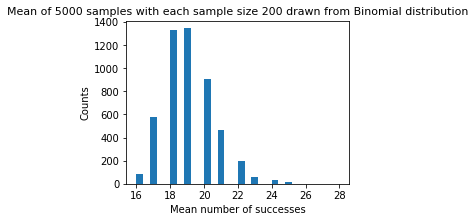

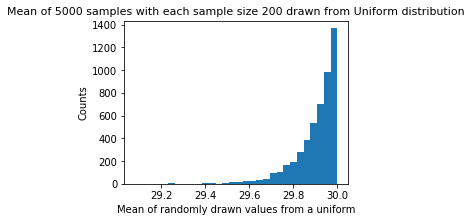

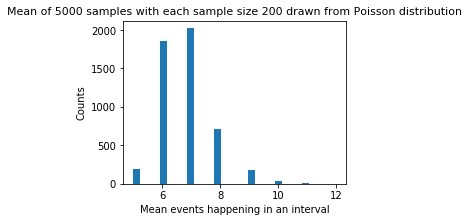

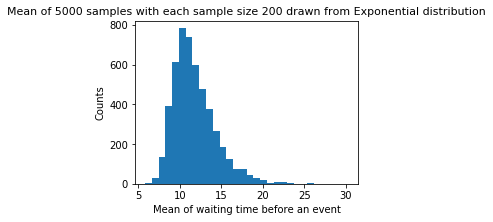

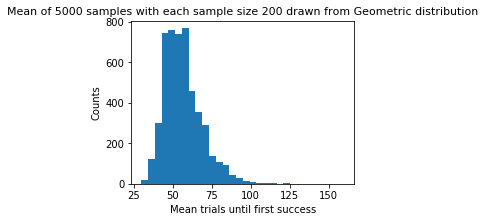

In [16]:
plot_bootstrapped_statistics(stats.binom, {'n': 100, 'p': 0.1}, stat_function=np.max)
plot_bootstrapped_statistics(stats.uniform, {'loc': 10, 'scale': 20}, stat_function=np.max) 
plot_bootstrapped_statistics(stats.poisson, {'mu': 2}, stat_function=np.max) 
plot_bootstrapped_statistics(stats.expon, {'scale': 2}, stat_function=np.max)
plot_bootstrapped_statistics(stats.geom, {'p': 0.1}, stat_function=np.max)

$
\begin{align}
\blacksquare
\end{align}
$

---

# part 1

In [18]:
lunch = np.loadtxt('data/lunch_hour.txt')
lunch

array([2.3, 2.5, 1.9, 2. , 1.2, 1.7, 3. , 1.4, 2. , 2.4, 1.8, 3. , 3. ,
       3.2, 1.8, 2.9, 1.3, 2.5, 1.5, 1.8, 1.6, 1.6, 2.8, 2. , 2. , 2.7,
       1.3, 3.1, 3.1, 1.4, 1.9, 1.6, 3.1, 2.6, 3.2, 2.1, 1.7, 2.6, 2.6,
       1.7, 1.3, 1.5, 1.2, 2.9, 2. , 1.2, 1.9, 2.7, 1.6, 1.5, 2.2, 2.1,
       2.8, 2.9, 2.5, 1.4, 1.7, 2.9, 1.6, 2.2, 2.4, 2.8, 1.3, 2.4, 1.7,
       2. , 2.3, 1.8, 1.2, 1.5, 1.6, 1.2, 2.2, 1.3, 2.4, 2.4, 2.8, 2.6,
       2.1, 2.8, 2.8, 1.6, 1.9, 3.2, 2.2, 1.5, 2.9, 1.8, 1.9, 2. , 3.2,
       2.7, 2.8, 1.4, 3.2, 3.1, 2.3, 1.6, 1.8, 1.7, 2. , 1.3, 2.1, 2.5,
       2.6, 2.5, 3. , 2.8, 2.6, 2.6, 1.7, 2.8, 2.5, 2.3, 2.2, 2.2, 2. ,
       1.5, 2.3, 2.2, 2.9, 1.8, 3.1, 2.2, 2.8, 2.1, 3. , 2.4, 1.4, 2.7,
       2.9, 2.5, 3.1, 2.5, 2.4, 2.5, 1.9, 2.1, 2.8, 3.1, 2.2, 1.5, 2.3,
       2.4, 3.2, 1.2, 1.5, 3. , 1.8, 1.6, 1.7, 2. , 2.9, 2.4, 1.8, 1.3,
       2.2, 1.6, 2.1, 1.6, 1.4, 1.6, 1.2, 2.6, 3.1, 2.9, 1.8, 1.7, 1.5,
       2.4, 1.5, 2. , 2.5, 2.5, 3. , 2.9, 1.8, 3.1, 2.5, 2.7, 2.

In [26]:
xbar = lunch.mean()
xbar

2.1845

> According to the CLT, any sample mean of a sufficiently large sample has a sampling distribution that approximates to the Normal distribution.

In [28]:
se = lunch.std(ddof=1) / (lunch.size ** 0.5)
se

0.040925827625524824

In [30]:
xbar - (se * 1.96), xbar + (se * 1.96)

(2.104285377853971, 2.2647146221460286)

> We are 95% confident that the true mean is between the lower and upper limit stated above

> If the sample size is smaller, the CI will be wider since the sample standard deviation is larger and hence the standard error is larger and therefore mean +/- 1.96 * SE is of a larger range. If the sample size is 10, we likely cannot leverage the interval computation as the sampling distribution of the mean might not yet well approximate a normal distribution.

$
\begin{align}
\blacksquare
\end{align}
$

---

# part 2

In [53]:
def bootstrap(arr, iterations=10000):
    size = arr.shape[0]
    arr = arr.reshape(size, 1)

    nrows = size
    boot_samples = []
    for _ in range(iterations):
        row_inds = np.random.randint(nrows, size=nrows)
        boot_sample = arr[row_inds, :]
        boot_samples.append(boot_sample)

    return boot_samples

In [54]:
rand_data = np.random.randn(5)
rand_data

array([ 0.6268179 ,  0.33509352,  1.41542503,  0.80163774, -0.05800271])

In [55]:
booted_data = bootstrap(rand_data, iterations = 3)
booted_data

[array([[-0.05800271],
        [ 0.80163774],
        [ 1.41542503],
        [-0.05800271],
        [ 0.6268179 ]]), array([[0.80163774],
        [1.41542503],
        [0.33509352],
        [0.33509352],
        [0.6268179 ]]), array([[ 0.80163774],
        [-0.05800271],
        [ 0.80163774],
        [ 0.80163774],
        [ 0.6268179 ]])]

$
\begin{align}
\blacksquare
\end{align}
$

---

# part 3

In [57]:
productivity = np.loadtxt('data/productivity.txt')
productivity

array([-19.1, -15.2, -12.4, -15.4,  -8.7,  -6.7,  -5.9,  -3.5,  -3.1,
        -2.1,   4.2,   6.1,   7. ,   9.1,  10. ,  10.3,  13.2,  10.1,
        14.1,  14.4,  20.1,  26.3,  27.7,  22.2,  23.4])

In [59]:
se = productivity.std(ddof=1) / (productivity.size ** 0.5)
se

2.74194018899027

In [60]:
productivity.mean()

5.044

In [62]:
productivity.mean() - (1.96 * se), productivity.mean() + (1.96 * se)

(-0.3302027704209296, 10.41820277042093)

> A sample of 25 is perhaps too small for us to reliably apply the CLT. Hence, we are not sure the sampling distribution will be normal. The CI is imprecise if the sampling distribution is not normal.

In [76]:
def bootstrap_confidence_interval(sample, stat_function=np.mean, iterations=1000, ci=95):
    boostrap_samples = bootstrap(sample, iterations=iterations)
    bootstrap_samples_stat = list(map(stat_function, boostrap_samples))
    low_bound = (100. - ci) / 2
    high_bound = 100. - low_bound
    lower_ci, upper_ci = np.percentile(bootstrap_samples_stat,
                                       [low_bound, high_bound])
    return lower_ci, upper_ci, bootstrap_samples_stat

In [77]:
lower_ci, upper_ci, bootstrap_means_prod = bootstrap_confidence_interval(productivity, ci=95)
print("The 95% bootstrapped CI of the mean: ({}, {})".format(lower_ci, upper_ci))
print("Your results would be slightly different" )

The 95% bootstrapped CI of the mean: (-0.6446999999999999, 10.188699999999997)
Your results would be slightly different


> Based on the 95% bootstrap CI, we are unable to conclude that the new monitors would lead to an productivity improvement in the population since the CI includes zero in the differences in productivity, implying possibility of no improvement or even reduction in performance.

In [78]:
lower_ci, upper_ci, bootstrap_samples_stat = bootstrap_confidence_interval(productivity, ci=90)
print("The 90% bootstrapped CI of the mean: ({}, {})".format( lower_ci, upper_ci))
print("Your results would be slightly different")

The 90% bootstrapped CI of the mean: (0.5316000000000001, 9.426199999999998)
Your results would be slightly different


> Here we see that the CI does not include 0, so we could conclude that there is statistical evidence that the monitors lead to an improvement.  However, we are allowing for a larger chance of a Type I Error.

> If you want 95% confidence in your decision the answer is obviously a no go since there is a potential decrease in production.  However, if we use the 90% CI to establish a minimum expected average improvement of 0.6 units (which should be close to the value printed above) this implies a net improvement of 0.60 units/person * 100 people = 60 units which has a value of `$2000*60 = $120,000` while the cost of new monitors would be `$500*100 = $50,000` leading to a profit of approx `$70,000 ==> they should buy the new monitors`.

$
\begin{align}
\blacksquare
\end{align}
$

---